# Objectives

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

In [3]:
!pip install --upgrade pip


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\msaur\Documents\projects python\TechMarketPredictiveModeller\.venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib
!pip install pandas
!pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

Importing the dataset

In [13]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

In [14]:
df.head(6)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0


# Single Linear Regression

In [15]:
lm=LinearRegression()

In [23]:
X=df[['CPU_frequency']]
Y= df['Price']

In [24]:
lm.fit(X,Y)

LinearRegression()

In [26]:
Yhat=lm.predict(X)

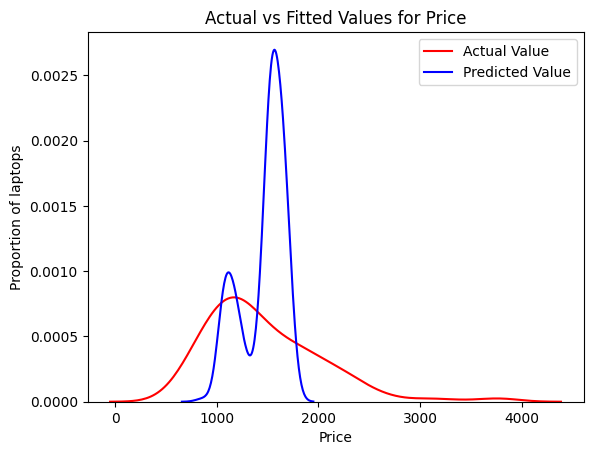

In [27]:
#  Creating a distribution plot for predicted values
ax1= sns.distplot(df['Price'],hist=False,color="r",label="Actual Value")
ax2= sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()



In [28]:
mse_slr=mean_squared_error(df['Price'],Yhat)
r2_score_slr=lm.score(X,Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


# Multiple Linear Regression

In [31]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm2=LinearRegression()
lm2.fit(Z,df['Price'])

LinearRegression()

In [32]:
Y_hat=lm2.predict(Z)

Text(0, 0.5, 'Proportion of laptops')

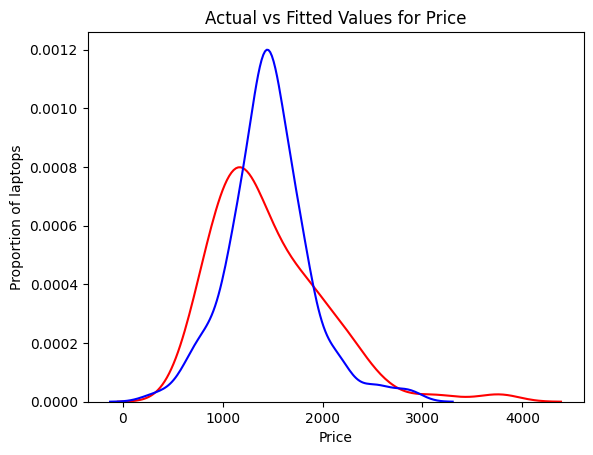

In [33]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [35]:
mse_slr1=mean_squared_error(df['Price'], Y_hat)
r2_score_slr2=lm2.score(Z,df['Price'])
print('The R-square for Linear Regression is: ', r2_score_slr2)
print('The mean square error of price and predicted value is: ', mse_slr1)

The R-square for Linear Regression is:  0.5082509055187376
The mean square error of price and predicted value is:  161680.57263893104


Text(0, 0.5, 'Proportion of laptops')

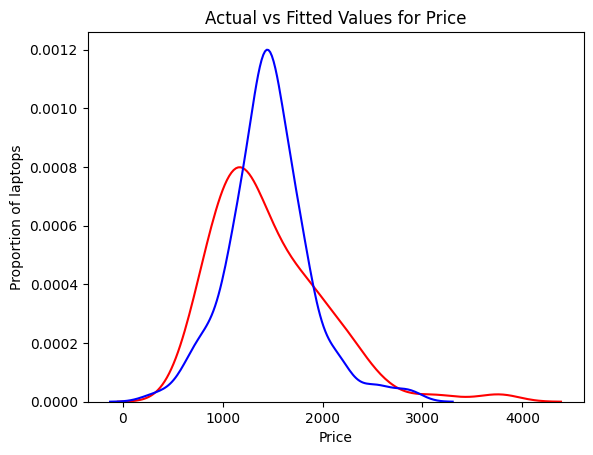

In [36]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

# Polynomial Regression

In [47]:
X= X.to_numpy().flatten()
f1=np.polyfit(X,Y,1)
p1=np.poly1d(f1)

f3=np.polyfit(X,Y,3)
p2=np.poly1d(f3)



AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [48]:
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [49]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

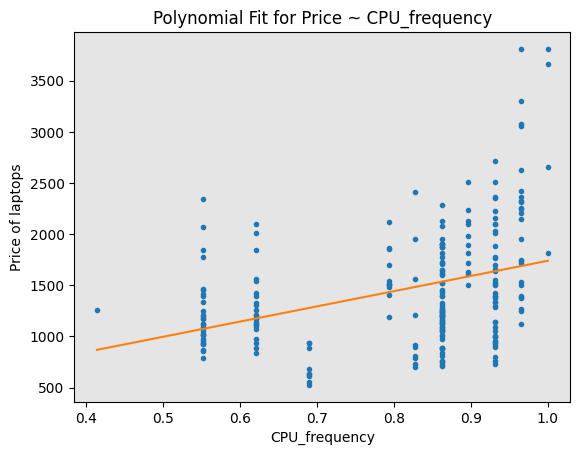

In [50]:
PlotPolly(p1,X,Y,'CPU_frequency') 

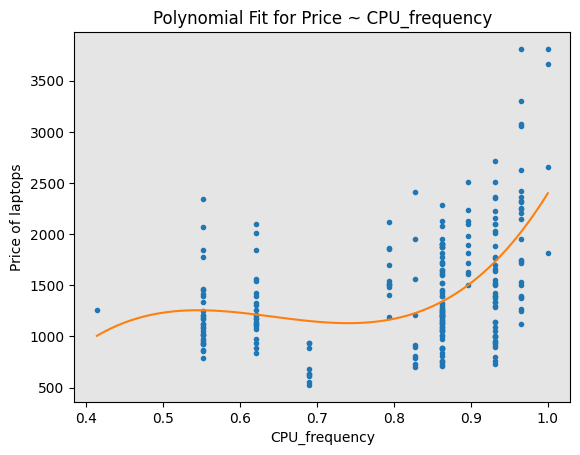

In [51]:
PlotPolly(p2,X,Y,'CPU_frequency')

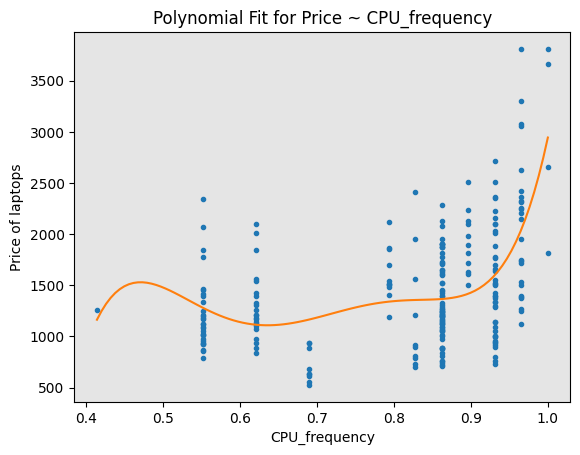

In [53]:
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
PlotPolly(p5,X,Y,'CPU_frequency')

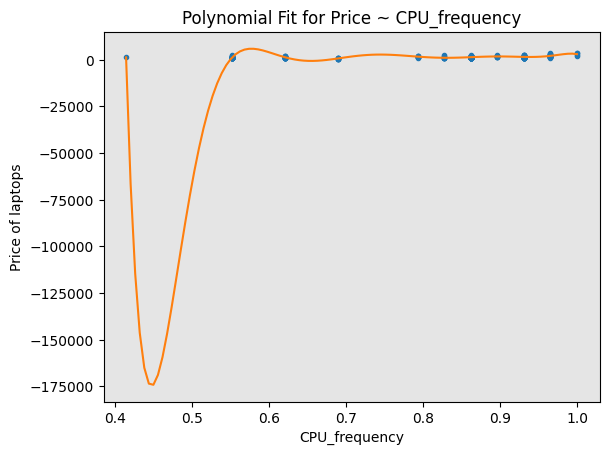

In [58]:
f11 = np.polyfit(X, Y, 9)
p11= np.poly1d(f11)
PlotPolly(p11,X,Y,'CPU_frequency')

# Pipeline

In [59]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe= Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [60]:
mse_slr4=mean_squared_error(Y,ypipe)
R2=r2_score(Y,ypipe)
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.80746232362
R^2 for multi-variable polynomial pipeline is:  0.6332096172725036
